What combination of age, job, balance, and loan status yields the highest conversion rate?

Can we identify low-probability segments to avoid targeting?

Can customers be ranked by likelihood of subscription?

Does combining variables provide stronger predictive power than single variables? 

Does the combination of age + job + loan status improve prediction compared to single factors? 


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("../../data/raw/bank-full.csv", sep=";")
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [4]:
df.describe(include='all')

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
count,45211.000000,45211,45211,45211,45211,45211.000000,45211,45211,45211,45211.000000,45211,45211.000000,45211.000000,45211.000000,45211.000000,45211,45211
unique,NaN,12,3,4,2,NaN,2,2,3,NaN,12,NaN,NaN,NaN,NaN,4,2
top,NaN,blue-collar,married,secondary,no,NaN,yes,no,cellular,NaN,may,NaN,NaN,NaN,NaN,unknown,no
freq,NaN,9732,27214,23202,44396,NaN,25130,37967,29285,NaN,13766,NaN,NaN,NaN,NaN,36959,39922
mean,40.936210,NaN,NaN,NaN,NaN,1362.272058,NaN,NaN,NaN,15.806419,NaN,258.163080,2.763841,40.197828,0.580323,NaN,NaN
std,10.618762,NaN,NaN,NaN,NaN,3044.765829,NaN,NaN,NaN,8.322476,NaN,257.527812,3.098021,100.128746,2.303441,NaN,NaN
min,18.000000,NaN,NaN,NaN,NaN,-8019.000000,NaN,NaN,NaN,1.000000,NaN,0.000000,1.000000,-1.000000,0.000000,NaN,NaN
25%,33.000000,NaN,NaN,NaN,NaN,72.000000,NaN,NaN,NaN,8.000000,NaN,103.000000,1.000000,-1.000000,0.000000,NaN,NaN
50%,39.000000,NaN,NaN,NaN,NaN,448.000000,NaN,NaN,NaN,16.000000,NaN,180.000000,2.000000,-1.000000,0.000000,NaN,NaN
75%,48.000000,NaN,NaN,NaN,NaN,1428.000000,NaN,NaN,NaN,21.000000,NaN,319.000000,3.000000,-1.000000,0.000000,NaN,NaN


In [5]:
print("\n", df['default'].value_counts())
print("\n", df['contact'].value_counts())
print("\n", df['poutcome'].value_counts())
print("\n", df['education'].value_counts())


 default
no     44396
yes      815
Name: count, dtype: int64

 contact
cellular     29285
unknown      13020
telephone     2906
Name: count, dtype: int64

 poutcome
unknown    36959
failure     4901
other       1840
success     1511
Name: count, dtype: int64

 education
secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: count, dtype: int64


In [6]:
df.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [7]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

The variable `duration` represents the length of the last contact with a customer (in seconds). Although it is one of the strongest predictors of subscription in the dataset, it must be excluded from segmentation and prediction models intended for `business targeting`, because it is not available at the time the bank decides which customers to target. Since call duration is only observed after a customer has been contacted, including it would introduce d`ata leakage`, allowing the model to use information that would not exist in a real targeting scenario. Interested customers tend to stay on the phone longer—it does not help identify customers `before contact occurs`, which is the objective of this segmentation and prediction analysis.

In [8]:
# Remove duration
df = df.drop(columns=['duration'])

In [9]:
#Encode target
df['y'] = df['y'].map({'yes':1,'no':0})

<Axes: >

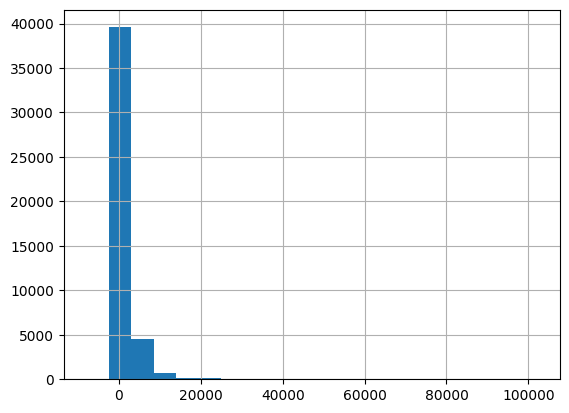

In [10]:
df['balance'].hist(bins=20)

count     45211.000000
mean       1362.272058
std        3044.765829
min       -8019.000000
25%          72.000000
50%         448.000000
75%        1428.000000
max      102127.000000
Name: balance, dtype: float64


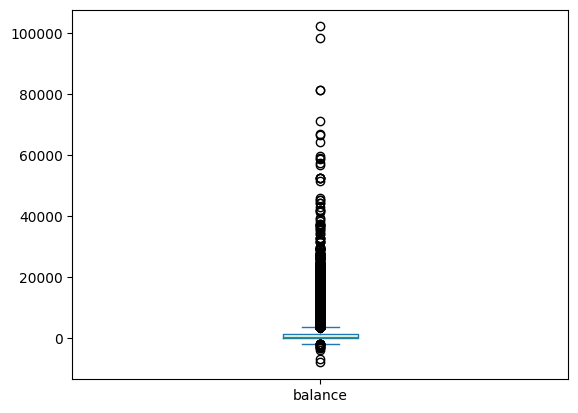

In [11]:
print(df['balance'].describe())
df['balance'].plot(kind='box')
plt.show()

The raw `balance` values are highly skewed and contain extreme positive and negative observations, which can lead to unstable or overly fragmented segments. Grouping balance into meaningful ranges (e.g., negative, low, medium, high) creates more stable and interpretable customer segments, allowing reliable comparison of conversion rates across financial profiles. Bucketing also reflects practical business usage, where customers are typically targeted based on broad financial capacity categories rather than precise account balances.

In [12]:
# Balance Bucketing
df['balance_bucket'] = pd.qcut(
    df.loc[df['balance'] >= 0, 'balance'],
    q=3,
    labels=['low','mid','high']
)

# Convert to object/string
df['balance_bucket'] = df['balance_bucket'].astype(object)

# Assign negative bucket
df.loc[df['balance'] < 0, 'balance_bucket'] = 'negative'

In [13]:
df['balance_bucket'].value_counts()

balance_bucket
low         13847
high        13814
mid         13784
negative     3766
Name: count, dtype: int64

<Axes: >

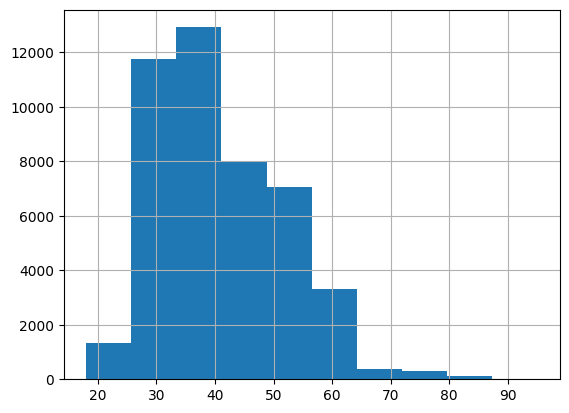

In [14]:
df['age'].hist()

count    45211.000000
mean        40.936210
std         10.618762
min         18.000000
25%         33.000000
50%         39.000000
75%         48.000000
max         95.000000
Name: age, dtype: float64


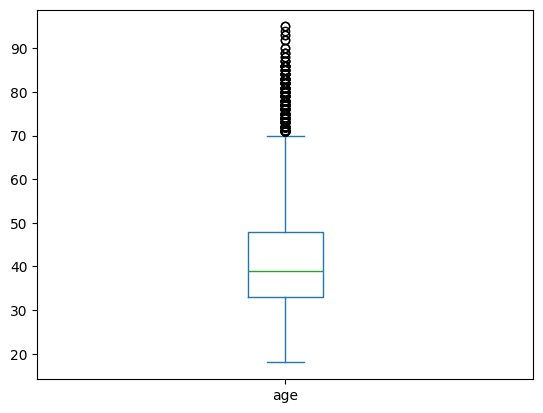

In [15]:
print(df['age'].describe())
df['age'].plot(kind='box')
plt.show()

Age was grouped into ranges based on the observed distribution to create stable and interpretable customer segments. The histogram shows that most customers fall between ages 25 and 65, with fewer observations at the extremes. Using age ranges reduces noise from individual ages while preserving meaningful life-stage differences relevant for marketing targeting

In [16]:
df['age_bucket'] = pd.cut(
    df['age'],
    bins=[18,25,35,45,55,65,100],
    labels=[
        '18-25',
        '25-35',
        '35-45',
        '45-55',
        '55-65',
        '65+'
    ]
)

In [17]:
df['age_bucket'].value_counts()

age_bucket
25-35    15571
35-45    13856
45-55     9548
55-65     4149
18-25     1324
65+        751
Name: count, dtype: int64

## Segmentation approach

To avoid misleading results from tiny groups, we apply a **minimum segment size** filter (e.g., at least 200 customers per segment). The final outputs focus on segments that are both **large enough to be reliable** and **meaningfully above/below the baseline** (via lift).


In [18]:
# Baseline conversion rate (full dataset)
baseline = df["y"].mean()
print("Baseline conversion rate:", round(baseline, 4))


Baseline conversion rate: 0.117


Calculates the baseline conversion rate to establish a reference for evaluating all customer segments and predictive results. Before identifying high- or low-performing groups, we need to know the overall probability of subscription in the dataset so we can judge whether a segment truly performs better or worse than average. This baseline will be used throughout the analysis to compute lift and to interpret whether a targeting strategy represents a meaningful improvement over contacting customers at random

In [19]:
# Segmentation thresholds (adjust to match your reporting needs)
MIN_N = 200          # minimum segment size (full dataset)
TARGET_LIFT = 1.50   # target threshold
AVOID_LIFT = 0.70    # avoid threshold


For the segmentation analysis, customers are grouped into segments based on selected variables (e.g., age bucket, loan status, or balance bucket), and the conversion rate is calculated for each segment. These segment conversion rates are compared to the overall baseline conversion rate using lift, defined as

$$
\text{Lift} = \frac{\text{Segment Conversion Rate}}{\text{Baseline Conversion Rate}}
$$

where:

$$
\text{Segment Conversion Rate} = \frac{\text{Number of Subscriptions in Segment}}{\text{Number of Customers in Segment}}
$$

$$
\text{Baseline Conversion Rate} = \frac{\text{Total Number of Subscriptions}}{\text{Total Number of Customers}}
$$
	​


Lift measures how much better or worse a segment performs relative to the average customer. To ensure reliable results, segment performance is evaluated separately on training and test datasets, and only segments with sufficient sample size and consistent lift are considered stable.

Consistent lift example: A segment such as customers aged 55–65 with no loan might have a conversion rate of 22% in the training set and 21% in the test set, resulting in similar lift values in both datasets. Because the segment performs consistently, it is considered stable and reliable for targeting. In contrast, if a segment shows 20% conversion in training but only 8% in test, the large difference suggests the segment is unstable and likely influenced by random variation.

Sample size example: Segments with very small sample sizes are removed because their conversion rates are unreliable. For example, if a segment contains only 12 customers in training and 5 in test, even a few subscriptions could produce a very high conversion rate (e.g., 40%), but this result could easily occur by chance. By requiring each segment to have at least a minimum number of observations (e.g., 30 customers in both training and test sets), the analysis focuses only on segments large enough to produce stable and trustworthy estimates.

In [20]:
def evaluate_segments_full(data, group_vars, baseline, min_size=200):
    """Compute segment size, conversion, lift, and % customers on the full dataset.

    Parameters
    ----------
    data : pandas.DataFrame
        Full dataset containing the target column 'y'.
    group_vars : list[str]
        Variables used to define segments (e.g., ['age_bucket', 'loan']).
    baseline : float
        Baseline conversion rate on the full dataset.
    min_size : int
        Minimum number of observations required for a segment to be included.

    Returns
    -------
    pandas.DataFrame
        Segment table with: n, conversion, lift, pct_customers.
    """
    seg = (
        data.groupby(group_vars, observed=True)
        .agg(
            n=("y", "size"),
            conv=("y", "mean")
        )
        .reset_index()
    )

    seg["lift"] = seg["conv"] / baseline
    seg["pct_customers"] = seg["n"] / len(data) * 100

    # Minimum-size filter for reliability
    seg = seg[seg["n"] >= min_size].copy()

    return seg.sort_values("lift", ascending=False)


In [21]:
# Define list of variables
profile_vars = [
    'age_bucket',
    'job',
    'marital',
    'education',
    'default',
    'housing',
    'loan',
    'balance_bucket'
]

## Segmentation (One-Way)

Start with one-way segments to understand which *single* variables are most associated with subscription (and to set expectations before looking for interactions).

In [22]:
single_tables = []

for var in profile_vars:
    seg = evaluate_segments_full(df, [var], baseline, min_size=MIN_N)

    seg["variable"] = var
    seg = seg.rename(columns={var: "segment_value"})

    seg = seg[[
        "variable",
        "segment_value",
        "n",
        "pct_customers",
        "conv",
        "lift"
    ]]

    single_tables.append(seg)

single_results_clean = pd.concat(single_tables, ignore_index=True)

single_results_clean.sort_values("lift", ascending=False).head(15)


,variable,segment_value,n,pct_customers,conv,lift
0,age_bucket,65+,751,1.661100,0.426099,3.642341
6,job,student,938,2.074716,0.286780,2.451433
1,age_bucket,18-25,1324,2.928491,0.236405,2.020817
7,job,retired,2264,5.007631,0.227915,1.948246
27,housing,no,20081,44.416182,0.167024,1.427737
31,balance_bucket,high,13814,30.554511,0.155350,1.327947
8,job,unemployed,1303,2.882042,0.155027,1.325188
21,education,tertiary,13301,29.419831,0.150064,1.282764
18,marital,single,12790,28.289576,0.149492,1.277874
2,age_bucket,55-65,4149,9.176970,0.141239,1.207326


## Two-Way Combinations

Two-way combinations help identify *interactions* (e.g., age group matters more when loan status is considered). We stop at two-way because 3+ way combinations quickly become sparse, unstable, and hard to operationalize.

In [23]:
# Updated two-way tests (bucketed variables for stability + interpretability)
two_way_tests = [
    ("age_bucket", "loan"),
    ("age_bucket", "housing"),
    ("loan", "housing"),

    ("balance_bucket", "loan"),
    ("balance_bucket", "housing"),
    ("balance_bucket", "age_bucket"),

    ("job", "loan"),
    ("job", "housing"),
    ("marital", "loan"),
    ("marital", "housing"),

    ("education", "job"),
    ("education", "loan"),

    ("age_bucket", "marital"),
    ("age_bucket", "job"),

    ("balance_bucket", "job"),
    ("balance_bucket", "marital"),
]

In [24]:
two_way_tables = []

for a, b in two_way_tests:
    seg = evaluate_segments_full(df, [a, b], baseline, min_size=MIN_N)

    # Create readable "values" label (e.g., 'student & no')
    seg["segment"] = seg[a].astype(str) + " & " + seg[b].astype(str)
    seg["segment_type"] = f"{a} × {b}"

    seg = seg[[
        "segment_type",
        "segment",
        "n",
        "pct_customers",
        "conv",
        "lift"
    ]]

    two_way_tables.append(seg)

two_way_results_clean = pd.concat(two_way_tables, ignore_index=True)
two_way_results_clean.sort_values("lift", ascending=False).head(20)


,segment_type,segment,n,pct_customers,conv,lift
41,balance_bucket × age_bucket,high & 65+,426,0.942249,0.446009,3.812541
166,age_bucket × job,65+ & retired,635,1.404525,0.444094,3.796172
0,age_bucket × loan,65+ & no,747,1.652253,0.425703,3.638958
10,age_bucket × housing,65+ & no,730,1.614651,0.417808,3.571474
153,age_bucket × marital,65+ & married,575,1.271814,0.417391,3.567910
11,age_bucket × housing,18-25 & no,627,1.386831,0.387560,3.312907
81,job × housing,student & no,689,1.523965,0.358491,3.064420
167,age_bucket × job,18-25 & student,398,0.880317,0.354271,3.028354
204,balance_bucket × job,high & student,309,0.683462,0.313916,2.683390
116,education × job,secondary & student,508,1.123620,0.297244,2.540878


### Decision tables: Target vs Avoid

To make the output decision-friendly, define simple rules:
- **Target**: high lift, stable, and big enough to matter
- **Avoid**: low lift, stable, and big enough to matter

(Thresholds below are adjustable, but keep them explicit.)

In [25]:
# Decision tables (full dataset): Target vs Avoid
targets = (
    two_way_results_clean[
        (two_way_results_clean["lift"] >= TARGET_LIFT)
    ]
    .sort_values(["lift", "pct_customers"], ascending=[False, False])
)

avoids = (
    two_way_results_clean[
        (two_way_results_clean["lift"] <= AVOID_LIFT)
    ]
    .sort_values(["lift", "pct_customers"], ascending=[True, False])
)

targets.head(15), avoids.head(15)


(                    segment_type              segment    n  pct_customers  \
 41   balance_bucket × age_bucket           high & 65+  426       0.942249   
 166             age_bucket × job        65+ & retired  635       1.404525   
 0              age_bucket × loan             65+ & no  747       1.652253   
 10          age_bucket × housing             65+ & no  730       1.614651   
 153         age_bucket × marital        65+ & married  575       1.271814   
 11          age_bucket × housing           18-25 & no  627       1.386831   
 81                 job × housing         student & no  689       1.523965   
 167             age_bucket × job      18-25 & student  398       0.880317   
 204         balance_bucket × job       high & student  309       0.683462   
 116              education × job  secondary & student  508       1.123620   
 205         balance_bucket × job       high & retired  967       2.138860   
 61                    job × loan         student & no  926     

## Target Map

A plot is helpful as *supporting evidence*, but the main interpretation should come from the decision tables above. Here we use an interactive chart with hover tooltips and only label a few top segments.

In [26]:
# Plotly setup: if notebook rendering fails, fall back to opening in browser
import plotly.io as pio

try:
    import nbformat  # noqa: F401
    # If nbformat exists, the default should work
except Exception:
    pio.renderers.default = "browser"

In [27]:
import numpy as np
import plotly.express as px

# Prepare plotting dataframe
plot_df = two_way_results_clean.copy()

plot_df["class"] = "Neutral"
plot_df.loc[plot_df["lift"] >= TARGET_LIFT, "class"] = "Target"
plot_df.loc[plot_df["lift"] <= AVOID_LIFT, "class"] = "Avoid"

# Bubble size scaling so big segments don't dominate
plot_df["size_sqrt"] = np.sqrt(plot_df["n"])

fig = px.scatter(
    plot_df,
    x="pct_customers",
    y="lift",
    size="size_sqrt",
    color="class",
    title="Decision Map (Two-way Segments): Lift vs % of Customers"
)

# Reference lines
fig.add_hline(y=1.0, line_dash="dot")
fig.add_hline(y=TARGET_LIFT, line_dash="dash")
fig.add_hline(y=AVOID_LIFT, line_dash="dash")

# Custom hover: ONLY show segment definition + class (numbers are in supplemental tables)
fig.update_traces(
    customdata=plot_df[["segment_type", "segment", "class"]].to_numpy(),
    hovertemplate=(
        "Segment: %{customdata[0]}<br>"
        "Values: %{customdata[1]}<br>"
        "Class: %{customdata[2]}"
        "<extra></extra>"
    )
)

fig.update_layout(
    xaxis_title="% of customers (full dataset)",
    yaxis_title="Lift vs baseline (full dataset)",
    legend_title_text="Segment class",
    height=650
)

fig.show()


### Supplemental tables

The plot is for exploration; the tables are for decisions.

In [29]:
# Supplemental decision table (top 10 targets + top 10 avoids)
targets_display = targets.copy()
targets_display["class"] = "Target"

avoids_display = avoids.copy()
avoids_display["class"] = "Avoid"

decision_table = pd.concat([
    targets_display.head(10),
    avoids_display.head(10)
], ignore_index=True)

decision_table


,segment_type,segment,n,pct_customers,conv,lift,class
0,balance_bucket × age_bucket,high & 65+,426,0.942249,0.446009,3.812541,Target
1,age_bucket × job,65+ & retired,635,1.404525,0.444094,3.796172,Target
2,age_bucket × loan,65+ & no,747,1.652253,0.425703,3.638958,Target
3,age_bucket × housing,65+ & no,730,1.614651,0.417808,3.571474,Target
4,age_bucket × marital,65+ & married,575,1.271814,0.417391,3.567910,Target
5,age_bucket × housing,18-25 & no,627,1.386831,0.387560,3.312907,Target
6,job × housing,student & no,689,1.523965,0.358491,3.064420,Target
7,age_bucket × job,18-25 & student,398,0.880317,0.354271,3.028354,Target
8,balance_bucket × job,high & student,309,0.683462,0.313916,2.683390,Target
9,education × job,secondary & student,508,1.123620,0.297244,2.540878,Target


In [34]:
import plotly.graph_objects as go

baseline = df["y"].mean()

fig = go.Figure(
    data=[
        go.Table(
            header=dict(
                values=[
                    "Segment type",
                    "Segment values",
                    "Class",
                    "% customers",
                    "Segment conv.",
                    "Lift"
                ],
                align="left"
            ),
            cells=dict(
                values=[
                    decision_table["segment_type"],
                    decision_table["segment"],
                    decision_table["class"],
                    decision_table["pct_customers"].round(2),
                    decision_table["conv"].round(3),
                    decision_table["lift"].round(2)
                ],
                align="left"
            )
        )
    ]
)

# fig.update_layout(
#     title="Decision Table: Target and Avoid Segments",
#     height=500
# )

fig.update_layout(
    title="Decision Table: Target and Avoid Segments",
    margin=dict(t=120)
)

# Baseline annotation (appears once above table)
fig.add_annotation(
    text=(
        f"Baseline conversion rate = {baseline:.3f}  |  "
        "% customers = segment size ÷ total customers  |  "
        "Lift = segment conversion ÷ baseline conversion"
    ),
    x=0,
    y=1.12,
    xref="paper",
    yref="paper",
    showarrow=False,
    align="left"
)

fig.show()

In [ ]:
# Visual "table": ranked bar charts

top_targets_vis = targets.head(12).copy()
top_targets_vis["label"] = top_targets_vis["segment_type"] + " | " + top_targets_vis["segment"]

fig = px.bar(
    top_targets_vis.sort_values("lift"),
    x="lift",
    y="label",
    orientation="h",
    title="Top Target Segments (ranked by lift)",
)

# Baseline annotation (appears once above table)
fig.add_annotation(
    text=(
        f"Baseline conversion rate = {baseline:.3f}  |  "
        "Lift = segment conversion ÷ baseline conversion"
    ),
    x=0,
    y=1.12,
    xref="paper",
    yref="paper",
    showarrow=False,
    align="left"
)
fig.add_vline(x=1.0, line_dash="dot")
fig.update_layout(xaxis_title="Lift vs baseline", yaxis_title="")
fig.show()


In [39]:
top_avoids_vis = avoids.head(12).copy()
top_avoids_vis["label"] = top_avoids_vis["segment_type"] + " | " + top_avoids_vis["segment"]

fig = px.bar(
    top_avoids_vis.sort_values("lift"),
    x="lift",
    y="label",
    orientation="h",
    title="Segments to Avoid (ranked by lift)",
)
# Baseline annotation (appears once above table)
fig.add_annotation(
    text=(
        f"Baseline conversion rate = {baseline:.3f}  |  "
        "Lift = segment conversion ÷ baseline conversion"
    ),
    x=0,
    y=1.12,
    xref="paper",
    yref="paper",
    showarrow=False,
    align="left"
)
fig.add_vline(x=1.0, line_dash="dot")
fig.update_layout(xaxis_title="Lift vs baseline", yaxis_title="")
fig.show()


After identifying target segments using descriptive analysis, simple predictive models are built to rank customers by likelihood of subscription and to summarize important variable combinations that segmentation alone cannot address. Segmentation describes average behavior within groups but cannot rank individual customers or summarize interaction patterns compactly. Therefore, two interpretable models are used: logistic regression and a decision tree. Logistic regression provides stable probability estimates that allow customers to be ranked for targeting, while the decision tree summarizes important variable combinations as simple rules. Together with segmentation, these models provide both actionable target segments and individual-level prioritization.

Logistic regression and decision trees are chosen because they balance predictive usefulness and interpretability. Logistic regression produces probability estimates that support customer ranking, while decision trees reveal how combinations of variables influence subscription behavior. More complex models such as random forests or gradient boosting could improve predictive accuracy slightly, but they are harder to interpret and provide less transparent decision rules. Since the goal is decision support rather than maximum predictive accuracy, interpretable models are preferred.

## Decision Tree (Explainable combinations)

Segmentation tables show *what* is high/low lift. A shallow decision tree gives a compact, human-readable summary of the most important *combinations* the data is using.

In [40]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import roc_auc_score

In [41]:
# Use ONLY pre-contact profile variables for targeting models (keep bucketed variables here for interpretability)
tree_features = [
    "age_bucket", "job", "marital", "education",
    "default", "housing", "loan", "balance_bucket"
]

X = df[tree_features].copy()
y = df["y"].astype(int)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=42, stratify=y
)

# IMPORTANT: treat pandas 'category' as categorical (not numeric passthrough)
cat_cols = X.select_dtypes(include=["object", "category", "bool"]).columns.tolist()
num_cols = X.select_dtypes(include=["number"]).columns.tolist()

preprocess = ColumnTransformer(
    transformers=[
        ("cat", OneHotEncoder(handle_unknown="ignore", sparse_output=False), cat_cols),
        ("num", "passthrough", num_cols),
    ],
    remainder="drop"
)

tree_pipe = Pipeline([
    ("prep", preprocess),
    ("model", DecisionTreeClassifier(
        max_depth=3,
        min_samples_leaf=200,
        random_state=42
    ))
])

tree_pipe.fit(X_train, y_train)

tree_probs = tree_pipe.predict_proba(X_test)[:, 1]
print("Decision Tree AUC:", round(roc_auc_score(y_test, tree_probs), 3))


Decision Tree AUC: 0.641


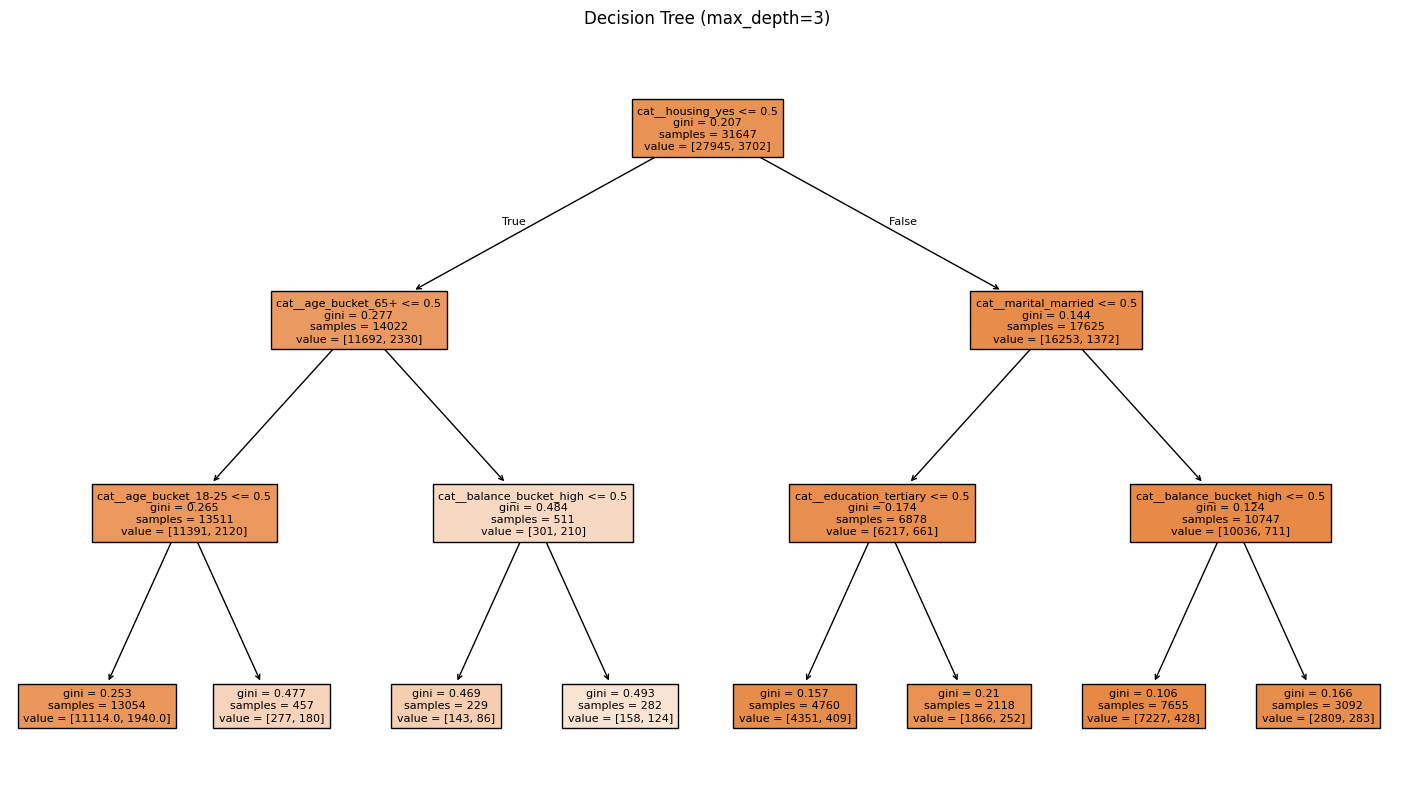

In [42]:
# Plot the tree (shallow = readable)
plt.figure(figsize=(18, 10))

tree_model = tree_pipe.named_steps["model"]
feature_names = tree_pipe.named_steps["prep"].get_feature_names_out()

plot_tree(
    tree_model,
    feature_names=feature_names,
    filled=True,
    max_depth=3,
    fontsize=8
)

plt.title("Decision Tree (max_depth=3)")
plt.show()

The decision tree shows that housing loan status is the strongest split in subscription behavior. The root node splits on cat__housing_yes ≤ 0.5, which corresponds to housing = no on the left branch and housing = yes on the right branch. The left branch (no housing loan) has a noticeably higher subscription rate than the right branch (housing loan), indicating that customers without housing loans are generally more receptive.

Left branch (housing = no): the next split is on age_bucket_65+. Customers who are 65+ fall into a high-response group (this branch has the highest subscription rate in the tree). For customers under 65, the tree then splits on balance_bucket_high, showing that high-balance customers subscribe at a higher rate than lower-balance customers. In short, within the “no housing loan” population, the strongest positive combinations are older age (65+) and high balance, which together indicate financially stable customers with higher likelihood of subscription.

Right branch (housing = yes): this side represents customers with housing loans and shows lower subscription rates overall. The next split on this side is marital_single, meaning the tree distinguishes single vs non-single (married/divorced) customers among those with housing loans. After that, the tree uses education_tertiary and/or balance_bucket_high to further separate response rates, suggesting that tertiary education and higher balances can slightly improve likelihood even within the housing-loan group, but the overall level remains lower than the best-performing “no housing loan” branches. Practically, the right side of the tree suggests that customers with housing loans are a lower-priority pool, and if they are targeted, the more promising subgroups are those with stronger financial/education signals (e.g., higher balance and/or tertiary education).

Actionable suggestions based on both sides:

- Primary targets: customers with housing = no, especially those who are 65+ or have high balances.

- Secondary targets: customers with housing = yes only if needed, prioritizing those with higher balances and/or tertiary education, and deprioritizing the rest of the housing-loan group.

- Overall: use housing loan status as the first screening rule, then use age and balance to refine targeting.

## Customer Ranking Model (Probability of subscription)

Segmentation gives interpretable groups; a predictive model lets us rank *individual customers* by likelihood of subscribing. We avoid `duration` to prevent leakage.

In [43]:
from sklearn.linear_model import LogisticRegression

logit_pipe = Pipeline([
    ("prep", preprocess),
    ("model", LogisticRegression(max_iter=2000))
])

logit_pipe.fit(X_train, y_train)

logit_probs = logit_pipe.predict_proba(X_test)[:, 1]
print("Logistic Regression AUC:", round(roc_auc_score(y_test, logit_probs), 3))

Logistic Regression AUC: 0.684


In [ ]:
rank_df = X_test.copy()
rank_df["prob"] = logit_probs
rank_df["actual"] = y_test.values

# Decile lift is calculated relative to the test-set baseline conversion rate because model predictions are evaluated on the test dataset.
baseline_test = y_test.mean()

# Create deciles (10 groups) by predicted probability
rank_df["decile"] = pd.qcut(rank_df["prob"], 10, labels=False)

decile_table = (
    rank_df.groupby("decile", observed=True)
           .agg(
               n=("actual", "count"),
               actual_rate=("actual", "mean"),
               avg_prob=("prob", "mean")
           )
           .sort_index(ascending=False)
)

decile_table["lift_vs_baseline"] = decile_table["actual_rate"] / baseline_test
decile_table

,n,actual_rate,avg_prob,lift_vs_baseline
decile,,,,
9,1357,0.299926,0.286899,2.563453
8,1353,0.188470,0.185062,1.610843
7,1337,0.140613,0.149052,1.201814
6,1379,0.132705,0.124460,1.134221
5,1344,0.080357,0.105745,0.686808
4,1350,0.086667,0.090150,0.740735
3,1368,0.074561,0.076794,0.637272
2,1362,0.063877,0.065173,0.545950
1,1355,0.055351,0.052771,0.473078


The logistic regression model successfully ranks customers by likelihood of subscription. Customers in the highest decile have a conversion rate of approximately 30%, compared to a baseline conversion rate of about 12%, corresponding to a lift of about 2.5. Lower deciles show progressively lower conversion rates, indicating that the model provides meaningful separation between high- and low-probability customers. This ranking can be used to prioritize customers for targeting campaigns.

In [59]:
logit_pipe.fit(X_train, y_train)

,"steps steps: list of tuplesList of (name of step, estimator) tuples that are to be chained insequential order. To be compatible with the scikit-learn API, all stepsmust define `fit`. All non-last steps must also define `transform`. See:ref:`Combining Estimators ` for more details.","[('prep', ...), ('model', ...)]"
,"transform_input transform_input: list of str, default=NoneThe names of the :term:`metadata` parameters that should be transformed by thepipeline before passing it to the step consuming it.This enables transforming some input arguments to ``fit`` (other than ``X``)to be transformed by the steps of the pipeline up to the step which requiresthem. Requirement is defined via :ref:`metadata routing `.For instance, this can be used to pass a validation set through the pipeline.You can only set this if metadata routing is enabled, which youcan enable using ``sklearn.set_config(enable_metadata_routing=True)``... versionadded:: 1.6",None
,"memory memory: str or object with the joblib.Memory interface, default=NoneUsed to cache the fitted transformers of the pipeline. The last stepwill never be cached, even if it is a transformer. By default, nocaching is performed. If a string is given, it is the path to thecaching directory. Enabling caching triggers a clone of the transformersbefore fitting. Therefore, the transformer instance given to thepipeline cannot be inspected directly. Use the attribute ``named_steps``or ``steps`` to inspect estimators within the pipeline. Caching thetransformers is advantageous when fitting is time consuming. See:ref:`sphx_glr_auto_examples_neighbors_plot_caching_nearest_neighbors.py`for an example on how to enable caching.",None
,"verbose verbose: bool, default=FalseIf True, the time elapsed while fitting each step will be printed as itis completed.",False
,"transformers transformers: list of tuplesList of (name, transformer, columns) tuples specifying thetransformer objects to be applied to subsets of the data.name : str Like in Pipeline and FeatureUnion, this allows the transformer and its parameters to be set using ``set_params`` and searched in grid search.transformer : {'drop', 'passthrough'} or estimator Estimator must support :term:`fit` and :term:`transform`. Special-cased strings 'drop' and 'passthrough' are accepted as well, to indicate to drop the columns or to pass them through untransformed, respectively.columns : str, array-like of str, int, array-like of int, array-like of bool, slice or callable Indexes the data on its second axis. Integers are interpreted as positional columns, while strings can reference DataFrame columns by name. A scalar string or int should be used where ``transformer`` expects X to be a 1d array-like (vector), otherwise a 2d array will be passed to the transformer. A callable is passed the input data `X` and can return any of the above. To select multiple columns by name or dtype, you can use :obj:`make_column_selector`.","[('cat', ...), ('num', ...)]"
,"remainder remainder: {'drop', 'passthrough'} or estimator, default='drop'By default, only the specified columns in `transformers` aretransformed and combined in the output, and the non-specifiedcolumns are dropped. (default of ``'drop'``).By specifying ``remainder='passthrough'``, all remaining columns thatwere not specified in `transformers`, but present in the data passedto `fit` will be automatically passed through. This subset of columnsis concatenated with the output of the transformers. For dataframes,extra columns not seen during `fit` will be excluded from the outputof `transform`.By setting ``remainder`` to be an estimator, the remainingnon-specified columns will use the ``remainder`` estimator. Theestimator must support :term:`fit` and :term:`transform`.Note that using this feature requires that the DataFrame columnsinput at :term:`fit` and :term:`transform` have identical order.",'drop'
,"sparse_threshold sparse_threshold: float, default=0.3If the output of the different transformers contains s

In [60]:
model_for_deciles = logit_pipe

### Identify Decile 9 Customers Explicitly

In [61]:
probs = model_for_deciles.predict_proba(X_test)[:,1]

decile_df = X_test.copy()

decile_df["probability"] = probs
decile_df["actual"] = y_test.values

decile_df["decile"] = pd.qcut(
    decile_df["probability"],
    10,
    labels=False
).astype(int)

In [62]:
decile_df.head()

,age_bucket,job,marital,education,default,housing,loan,balance_bucket,probability,actual,decile
37735,35-45,blue-collar,divorced,secondary,no,no,no,mid,0.142554,1,7
44332,25-35,unemployed,single,tertiary,no,no,no,low,0.215297,1,9
4432,35-45,self-employed,married,secondary,no,yes,no,mid,0.062438,0,2
38725,25-35,blue-collar,married,secondary,no,yes,yes,low,0.034511,1,0
38581,35-45,services,single,secondary,no,yes,no,mid,0.090760,0,4


### Conclusion

This analysis combined segmentation and predictive modeling to support marketing targeting decisions using the bank marketing dataset. The goal was to identify promising customer groups, avoid low-probability segments, rank customers by likelihood of subscription, and understand how combinations of variables influence subscription behavior.

1. What combinations of customer characteristics yield the highest conversion rates?

Segmentation analysis identified several combinations associated with higher subscription rates. In particular, customers without housing or personal loans, older customers, and customers with higher account balances consistently showed higher conversion rates. Two-way segment analysis showed that combining variables such as loan status and age or loan status and balance produces clearer separation in conversion rates than single variables alone.

These results suggest that customers with fewer financial obligations and stronger financial positions represent the most promising target groups.

2. Can we identify low-probability segments to avoid targeting?

Segmentation analysis also identified segments with consistently low conversion rates. In particular, customers with housing loans and low balances tend to have conversion rates substantially below the overall baseline. These segments represent lower expected returns and are less suitable for resource-intensive campaigns.

Identifying low-probability segments is important because avoiding these customers can improve campaign efficiency by reducing effort spent on unlikely prospects.

3. Does combining variables provide stronger insight than single variables?

Single-variable segmentation showed moderate differences in conversion rates, but combining variables provided clearer and more actionable insights. Two-way combinations such as:

- housing loan × balance

- housing loan × age

- loan status × education

produced more distinct high- and low-performing groups than single-variable analysis.

This indicates that subscription behavior depends on interactions between customer characteristics, and that combinations of variables provide more informative segmentation.

4. Can customers be ranked by likelihood of subscription?

Logistic regression was used to estimate a probability of subscription for each customer. The model successfully ranked customers by likelihood of subscription, with the highest decile showing conversion rates more than twice the baseline rate and the lowest deciles showing substantially lower conversion rates.

Unlike segmentation, which describes average behavior within groups, logistic regression produces a targeting score for each individual customer. Customers with the highest predicted probabilities represent the most promising prospects and can be prioritized for outreach.

This ranking allows campaign lists to be generated by selecting customers with the highest predicted probabilities rather than relying only on broad segments.

5. Does combining variables improve predictive power?

Both logistic regression and the decision tree show that combining variables improves prediction compared to using individual variables alone. The decision tree reveals that housing loan status is the strongest factor, followed by combinations involving age, balance, education, and marital status. These combinations explain differences in subscription behavior more clearly than single variables.

The decision tree provides interpretable rules that summarize how variables interact, while logistic regression combines variables to estimate individual probabilities.

6. How segmentation and prediction work together

Segmentation and predictive modeling provide complementary insights.

- Segmentation identifies which types of customers are generally promising

- Logistic regression identifies which specific customers should be contacted first

- The decision tree explains how combinations of variables influence subscription behavior

Together, these methods support a coherent targeting strategy that balances interpretability and predictive usefulness.

### Final Targeting Implications

The analysis suggests a targeting strategy based on both segment-level insights and individual-level prioritization:

- Prioritize customers without housing loans, especially those with higher balances or older age groups

- Use segmentation rules to define promising customer groups

- Use predicted probabilities to prioritize customers within those groups

- Reduce effort on segments with consistently low conversion rates

Overall, combining segmentation with interpretable predictive models provides a practical and transparent framework for improving marketing targeting decisions.